In [1]:
%matplotlib widget

In [2]:
import numpy as np
import dataset
import plot_utils

In [3]:
# Generate data
m = 100
xs,ys = dataset.get_beans(m)

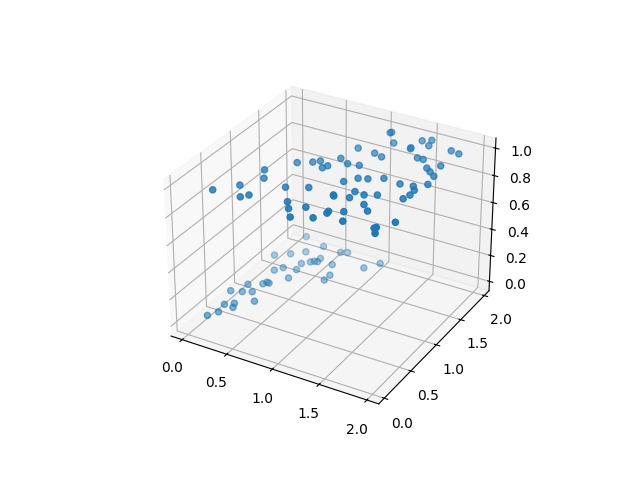

In [4]:
# checkout our data
plot_utils.show_scatter(xs,ys)

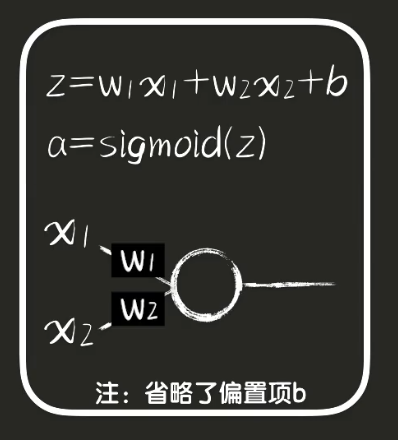

In [5]:
w1 = 0.1
w2 = 0.1
b = 0.1

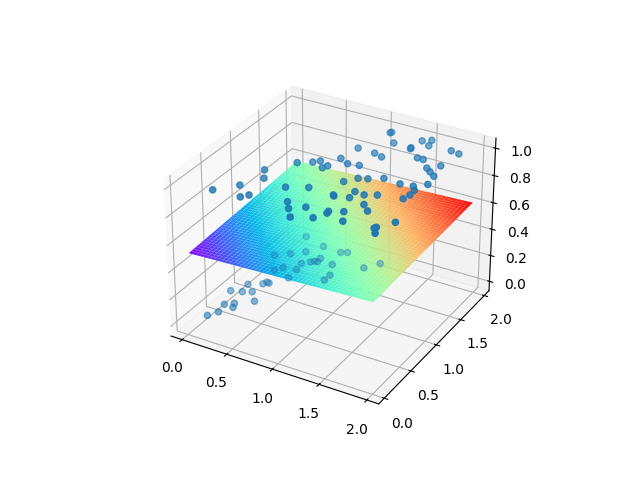

In [6]:
x1s = xs[:, 0]
x2s = xs[:, 1]

def forward(x1s, x2s):
    z = w1 * x1s + w2 * x2s + b
    a = 1/(1 + np.exp(-z))
    return a

plot_utils.show_scatter_surface(xs, ys, forward)

In [7]:
# stochastic gradient descent
for _ in range(500):
    for i in range(m):
        x = xs[i]
        y = ys[i]
        x1 = x[0]
        x2 = x[1]
        a = forward(x1, x2)
        
        e = (y - a)**2
        de_da = -2 * (y - a)
        da_dz = a * (1 - a)
        dz_dw1 = x1
        dz_dw2 = x2
        dz_db = 1
        
        de_dw1 = de_da * da_dz * dz_dw1
        de_dw2 = de_da * da_dz * dz_dw2
        de_db = de_da * da_dz * dz_db
        
        alpha = 0.01
        w1 = w1 - alpha * de_dw1
        w2 = w2 - alpha * de_dw2
        b = b - alpha * de_db


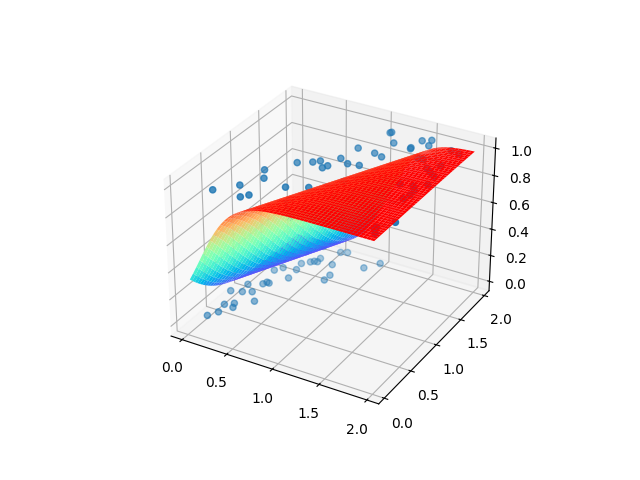

In [8]:
plot_utils.show_scatter_surface(xs, ys, forward)
